In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('/content/advertising.csv')

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.shape

(200, 4)

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**Basic observation**

avg expense spend is highest on tv

avg expense spend is lowest on radio

max sale=27 and min sale =1.6

<function matplotlib.pyplot.show(close=None, block=None)>

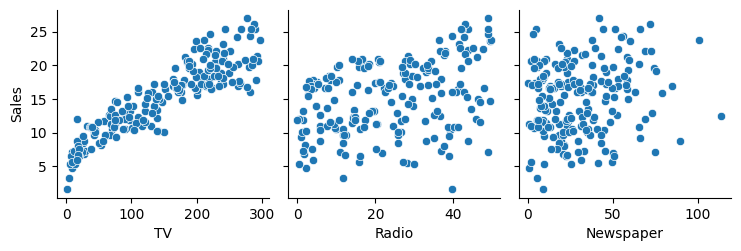

In [13]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show

**pairplot observation**

when advertisement cost increases in tv adds , the sales will increase as well. while for the news paper and radio its a bit unpredictable

<Axes: ylabel='Frequency'>

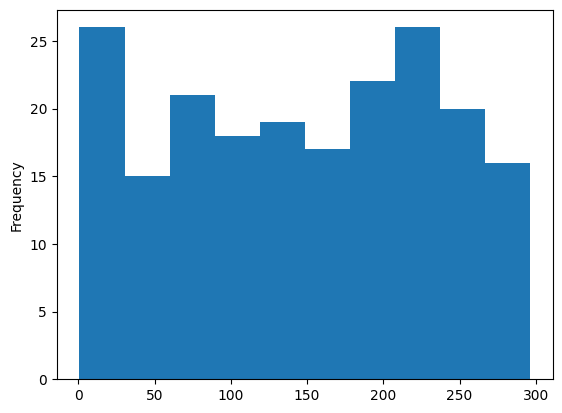

In [15]:
data['TV'].plot.hist(bins=10)

<Axes: xlabel='Radio', ylabel='Frequency'>

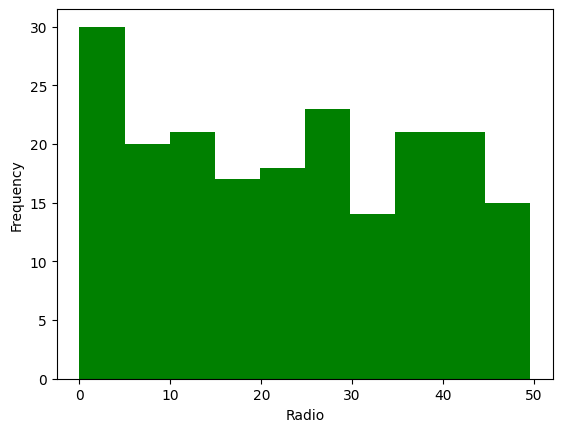

In [18]:
data['Radio'].plot.hist(bins=10,color="green",xlabel="Radio")

<Axes: xlabel='newspaper', ylabel='Frequency'>

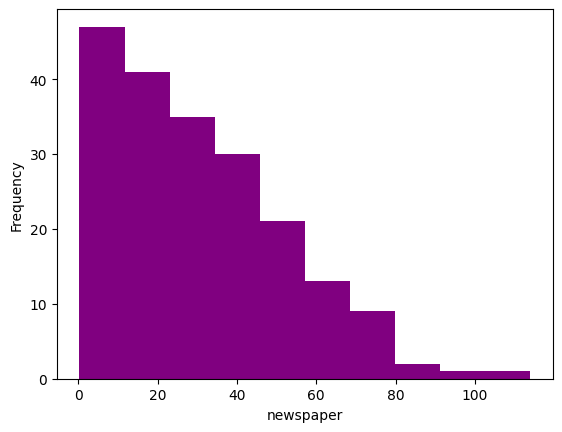

In [20]:
data['Newspaper'].plot.hist(bins=10,color="purple",xlabel="newspaper")

**Histogram observation**

The majority sales is the result of low advertising cost in the newspaper.


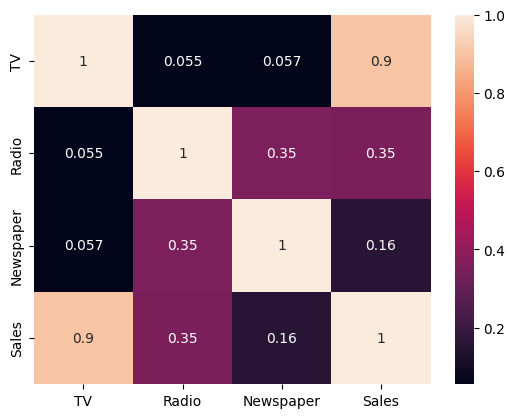

In [21]:
sns.heatmap(data.corr(),annot=True)
plt.show()

**sales is highly (+ve) correlated with the tv**



model training---->
based on one variable i.e tv

spliting data

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['TV']],data[['Sales']],test_size=0.3,random_state=42)

In [34]:
print(x_test)

        TV
95   163.3
15   195.4
30   292.9
158   11.7
128  220.3
115   75.1
69   216.8
170   50.0
174  222.4
45   175.1
66    31.5
182   56.2
165  234.5
78     5.4
186  139.5
177  170.2
56     7.3
152  197.6
82    75.3
68   237.4
124  229.5
16    67.8
148   38.0
93   250.9
65    69.0
60    53.5
84   213.5
67   139.3
125   87.2
132    8.4
9    199.8
18    69.2
55   198.9
75    16.9
150  280.7
104  238.2
135   48.3
137  273.7
164  117.2
76    27.5
79   116.0
197  177.0
38    43.1
24    62.3
122  224.0
195   38.2
29    70.6
19   147.3
143  104.6
86    76.3
114   78.2
173  168.4
5      8.7
126    7.8
117   76.4
73   129.4
140   73.4
98   289.7
172   19.6
96   197.6


In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [38]:
#for each values of x_test there will be predicted value of sales(y_test)
y_predicted=model.predict(x_test)
print(y_predicted)

[[16.16109107]
 [17.92129084]
 [23.26769201]
 [ 7.84812269]
 [19.28667945]
 [11.32465432]
 [19.09475735]
 [ 9.94829874]
 [19.4018327 ]
 [16.8081427 ]
 [ 8.93385339]
 [10.28827502]
 [20.0653348 ]
 [ 7.50266292]
 [14.85602084]
 [16.53945177]
 [ 7.6068492 ]
 [18.04192759]
 [11.3356213 ]
 [20.22435596]
 [19.79116038]
 [10.92435967]
 [ 9.29028013]
 [20.96462689]
 [10.99016153]
 [10.14022083]
 [18.91380224]
 [14.84505386]
 [11.98815642]
 [ 7.66716757]
 [18.16256433]
 [11.00112851]
 [18.11321294]
 [ 8.13326408]
 [22.59870643]
 [20.26822387]
 [ 9.85507944]
 [22.21486224]
 [13.63320293]
 [ 8.71451385]
 [13.56740107]
 [16.91232898]
 [ 9.56993804]
 [10.62276781]
 [19.48956852]
 [ 9.30124711]
 [11.07789734]
 [15.28373293]
 [12.94228339]
 [11.39045618]
 [11.49464246]
 [16.44074898]
 [ 7.68361804]
 [ 7.63426664]
 [11.39593967]
 [14.30218851]
 [11.23143502]
 [23.09222038]
 [ 8.28131827]
 [18.04192759]]


In [30]:
model.coef_

array([[0.05483488]])

Interpretation: A positive effect, where each unit increase in the feature leads to an increase of 0.05483488 units in the predicted target value.

In [31]:
model.intercept_

array([7.20655455])

Interpretation:  If no money is spent on TV ads (TV = 0), the model predicts that the baseline sales would be approximately 7.2066 units. This baseline value represents the expected sales without any contribution from TV ad spending.

In [36]:
#B1=0.05483488,x_test=69.2,B0=7.20655455
0.05483488*163.3+7.20655455

16.161090454000004

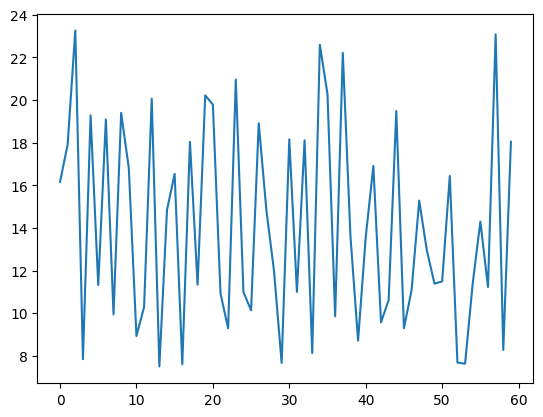

In [39]:
plt.plot(y_predicted)

Evaluation

In [40]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}")


R-squared: 0.814855389208679


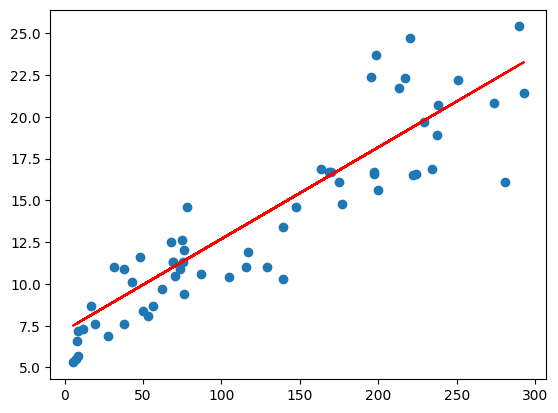

In [42]:
plt.scatter(x_test,y_test)
plt.plot(x_test,0.05483488*x_test+7.20655455,'r')
plt.show()